In [1]:
import torch
import torch.nn as nn
import os
from PIL import Image
import sys
from torchvision import transforms
import matplotlib.pyplot as plt

d:\Anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


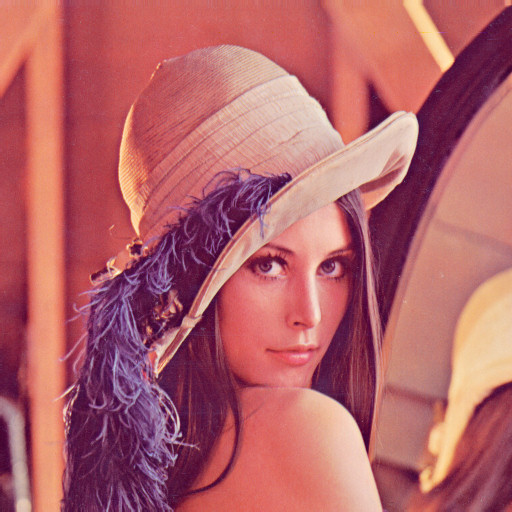

In [9]:
base_dir = os.path.dirname(os.path.abspath('convlution.ipynb'))
img_path = os.path.join(base_dir,'lena.png')
work_dir = os.path.dirname(base_dir)
sys.path.append(work_dir)
img = Image.open(img_path).convert('RGB')
img

In [46]:
img_transform = transforms.Compose([transforms.ToTensor()])
img_tensor = img_transform(img)
img_tensor.unsqueeze_(dim = 0) #C H W -> B C H W 

tensor([[[[0.8824, 0.8824, 0.8824,  ..., 0.8941, 0.8549, 0.7961],
          [0.8784, 0.8824, 0.8784,  ..., 0.9059, 0.8588, 0.7922],
          [0.8824, 0.8784, 0.8784,  ..., 0.9137, 0.8667, 0.7765],
          ...,
          [0.3216, 0.3098, 0.3686,  ..., 0.6863, 0.6824, 0.6824],
          [0.3216, 0.3137, 0.3843,  ..., 0.7059, 0.7137, 0.7059],
          [0.3255, 0.3176, 0.3882,  ..., 0.7020, 0.7216, 0.7216]],

         [[0.5412, 0.5333, 0.5333,  ..., 0.5843, 0.5176, 0.3922],
          [0.5333, 0.5333, 0.5333,  ..., 0.5882, 0.5216, 0.3922],
          [0.5373, 0.5373, 0.5373,  ..., 0.5765, 0.5098, 0.3804],
          ...,
          [0.0863, 0.0706, 0.1176,  ..., 0.2706, 0.2588, 0.2588],
          [0.0863, 0.0745, 0.1333,  ..., 0.2745, 0.2824, 0.2863],
          [0.0902, 0.0784, 0.1373,  ..., 0.2667, 0.2941, 0.2941]],

         [[0.4745, 0.5020, 0.5176,  ..., 0.4627, 0.4196, 0.3333],
          [0.4784, 0.5020, 0.5176,  ..., 0.4745, 0.4314, 0.3451],
          [0.4902, 0.5020, 0.5098,  ..., 0

In [11]:
from tools.common_tools import set_seed,transform_invert

In [16]:
conv_layer = nn.Conv2d(3,1,3)
nn.init.xavier_normal_(conv_layer.weight.data)
img_conv = conv_layer(img_tensor)

In [18]:
conv_layer = nn.ConvTranspose2d(3,1,3,stride=2)
nn.init.xavier_normal_(conv_layer.weight.data)
img_conv = conv_layer(img_tensor)

卷积前尺寸:torch.Size([1, 3, 512, 512])
卷积后尺寸:torch.Size([1, 1, 510, 510])


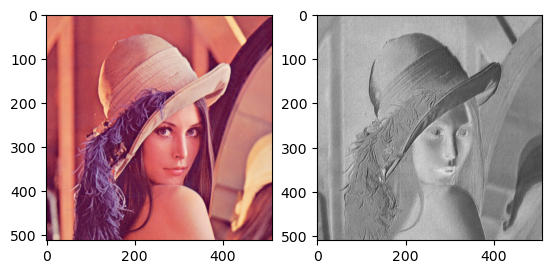

In [17]:
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_conv.shape))
img_conv = transform_invert(img_conv[0, 0:1, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_conv, cmap='gray')
plt.subplot(121).imshow(img_raw)
plt.show()


卷积前尺寸:torch.Size([1, 3, 512, 512])
卷积后尺寸:torch.Size([1, 1, 1025, 1025])


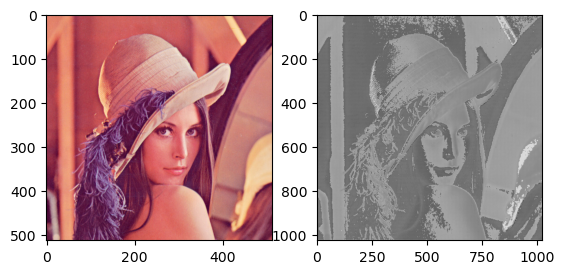

In [19]:
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_conv.shape))
img_conv = transform_invert(img_conv[0, 0:1, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_conv, cmap='gray')
plt.subplot(121).imshow(img_raw)
plt.show()

In [43]:
conv_layer = nn.Conv3d(3,1,(1,3,3),padding=(1,0,0),bias=False)
nn.init.xavier_normal_(conv_layer.weight.data)
img_tensor.unsqueeze_(dim = 2)
img_conv = conv_layer(img_tensor)

卷积前尺寸:torch.Size([1, 3, 1, 512, 512])
卷积后尺寸:torch.Size([1, 1, 3, 510, 510])


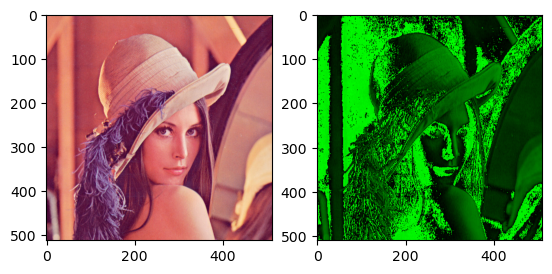

In [45]:
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_conv.shape))
img_conv = transform_invert(img_conv.squeeze(), img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_conv)
plt.subplot(121).imshow(img_raw)
plt.show()

In [47]:
conv_layer = nn.Conv3d(3,1,(3,3,3),padding=(1,0,0),bias=False)
nn.init.xavier_normal_(conv_layer.weight.data)
img_tensor.unsqueeze_(dim = 2)
img_conv = conv_layer(img_tensor)

卷积前尺寸:torch.Size([1, 3, 1, 512, 512])
卷积后尺寸:torch.Size([1, 1, 1, 510, 510])


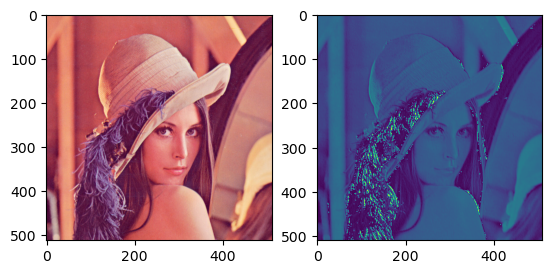

In [48]:
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_conv.shape))
img_conv = transform_invert(img_conv[:,:,...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_conv)
plt.subplot(121).imshow(img_raw)
plt.show()